# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
#there was a duplicate record in the data, by removing duplicates the total number of mice is 248. 
# The total count of mice by gender also showed that 49% female mice and 51% male mice.
# Compared to others, Ramicane appears to be the most effective treatment as it has the smaller Tumor Volume mean value
#  and lower standard deviation for tumor volumes. 
#Ketapril appears to be the least effective treament, it has the highest Tumor Volume mean value and higher standar deviation for tumor volume.
#Positive correlation exists between Capomulion mices' weight and mean tumor volume

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_df=pd.merge(study_results,mouse_metadata,how='left', on="Mouse ID")


# Display the data table for preview
combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_subset=combine_df.loc[combine_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_subset

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_dup_data=combine_df.loc[combine_df['Mouse ID']=='g989']
filtered_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_df.loc[combine_df['Mouse ID']!='g989']
clean_df.head()    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


groupby_df=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_value=groupby_df.mean()
median_values=groupby_df.median()
variance_values=groupby_df.var()
standard_dev=groupby_df.var()
sem_value=groupby_df.sem()
summary_stats_df=pd.DataFrame({
    # "Drug Regimen":mean_value.index,
                               "Mean Tumor Volume":mean_value.values,
                               "Median Tumor Volume":median_values,
                               "Tumor Volume Variance":variance_values,
                                "Tumor Volume Std. Dev.":standard_dev,
                                "Tumor Volume Std. Err.":sem_value

                               
                               })
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
oneliner_summary=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}
)
# Using the aggregation method, produce the same summary statistics in a single line
oneliner_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

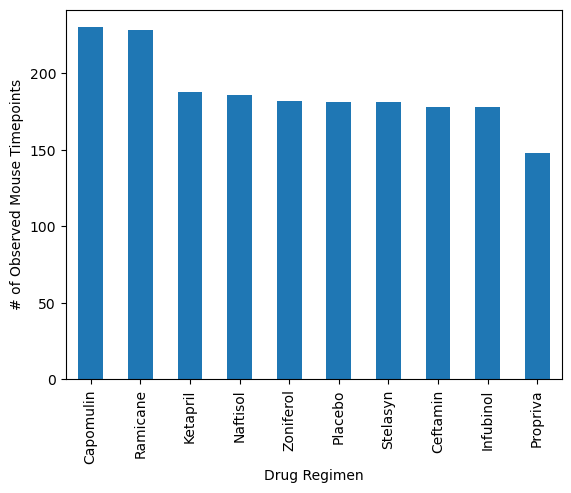

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_regimen_count=clean_df.groupby("Drug Regimen")["Timepoint"].count()
Drug_regimen_count=Drug_regimen_count.sort_values(ascending=False)
Drug_regimen_count.plot(kind='bar')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

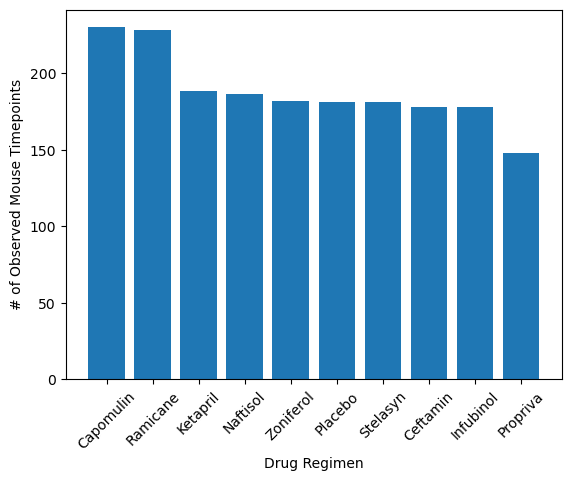

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_regimen_count=clean_df.groupby("Drug Regimen")["Timepoint"].count()
Drug_regimen_count=Drug_regimen_count.sort_values(ascending=False)
plt.bar(Drug_regimen_count.index,Drug_regimen_count.values)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.show()

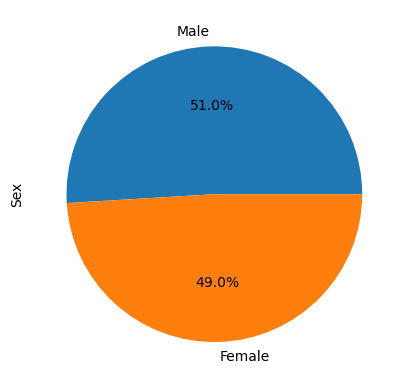

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=clean_df["Sex"].value_counts()
gender_data.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

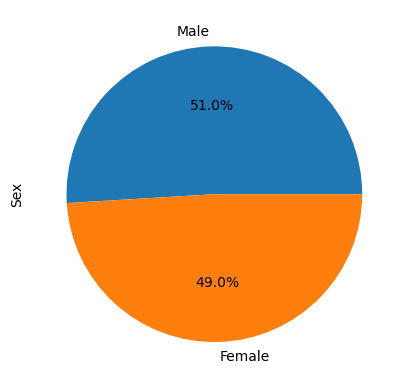

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data=clean_df["Sex"].value_counts()
gender_data.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens_filter=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
treatment_regimens_filter
regimen_filter_df=clean_df[clean_df['Drug Regimen'].isin(treatment_regimens_filter)]
regimen_filter_df.head()

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=regimen_filter_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df=max_timepoint_df.to_frame()
max_timepoint_df=max_timepoint_df.reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df=max_timepoint_df.merge(regimen_filter_df)
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens_filter=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens_filter:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes=tumor_volume_df[ tumor_volume_df['Drug Regimen']==treatment] ['Tumor Volume (mm3)']   
    # print(tumor_volumes)
    
    
    # add subset 
    data.append(tumor_volumes)
    quartiles=tumor_volumes.quantile([.25,.5,.75])
    
    
    # Determine outliers using upper and lower bounds
    iqr=quartiles[0.75]-quartiles[0.25]
    l=quartiles[0.25]-iqr*1.5
    u=quartiles[0.75]+iqr*1.5
    
    outliers_above=tumor_volumes[lambda x:x>u]
    outliers_below=tumor_volumes[lambda x:x<l]
    print(f"{treatment}'s potential outliers: {round(iqr,2)} lower limit:{round(l,2)}  upper limit:{round(u,2)} ")
    if outliers_above.any():
        print(f'{treatment} has outliers above')
    if outliers_below.any():
        print(f'{treatment} has outliers below')




Capomulin's potential outliers: 7.78 lower limit:20.7  upper limit:51.83 
Ramicane's potential outliers: 9.1 lower limit:17.91  upper limit:54.31 
Infubinol's potential outliers: 11.48 lower limit:36.83  upper limit:82.74 
Infubinol has outliers below
Ceftamin's potential outliers: 15.58 lower limit:25.36  upper limit:87.67 


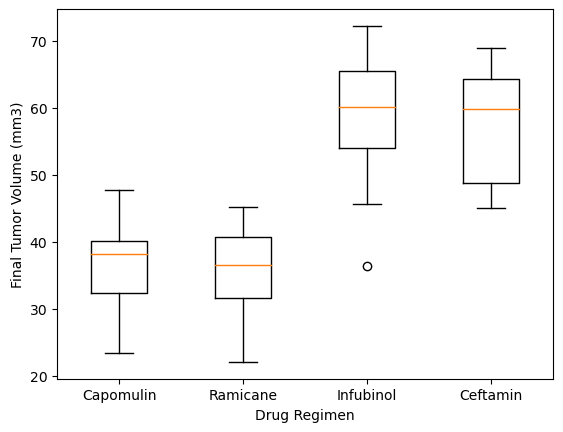

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(data,labels=treatment_regimens_filter)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

b128


Text(0, 0.5, 'Tumor Volume (mm3)')

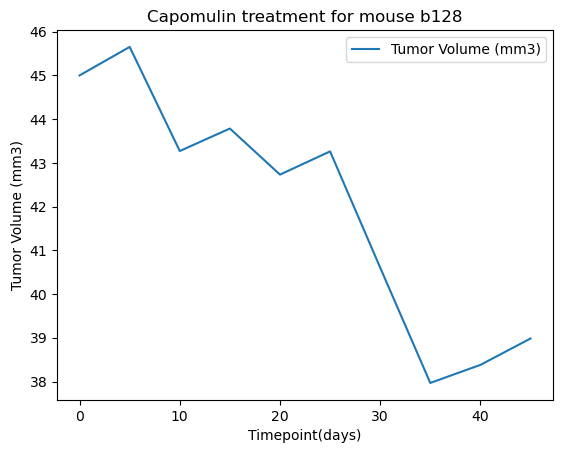

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df=clean_df[(clean_df["Drug Regimen"]=='Capomulin')]
m=df.iloc[0]['Mouse ID']
print(m)
tumor_volumes=df[df['Mouse ID']==m][['Timepoint','Tumor Volume (mm3)']]

tumor_volumes.plot(x='Timepoint',y='Tumor Volume (mm3)')

plt.title(f"Capomulin treatment for mouse {m}")

plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")



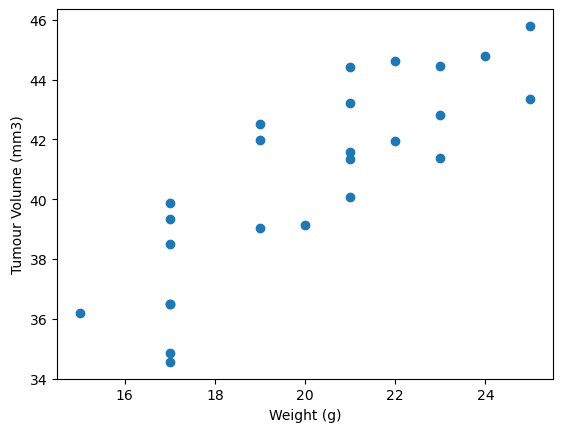

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_scatter_plot=clean_df.loc[(clean_df["Drug Regimen"]=='Capomulin')]
df_avg_wt=df_scatter_plot.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()
# df_avg_wt
plt.scatter(df_avg_wt['Weight (g)'],df_avg_wt['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(
df_avg_wt['Weight (g)'],df_avg_wt['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

The correlation between mouse weight and the average tumor volume is 0.84


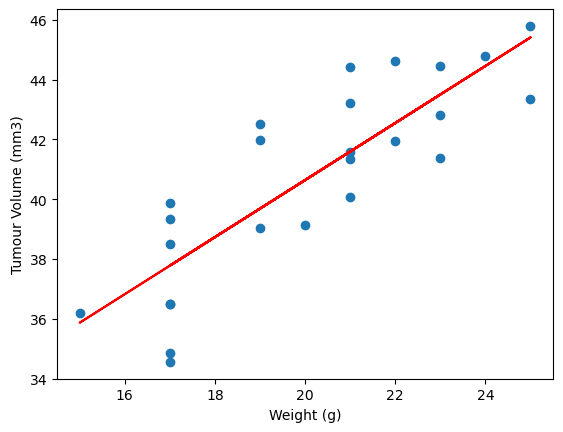

In [29]:
x_values = df_avg_wt['Weight (g)']
# y_values = df_avg_wt['Tumor Volume (mm3)']
model = st.linregress( df_avg_wt['Weight (g)'],df_avg_wt['Tumor Volume (mm3)'])
y_values = df_avg_wt['Weight (g)']*model[0]+model[1]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(df_avg_wt['Weight (g)'],df_avg_wt['Tumor Volume (mm3)'])
plt.plot(df_avg_wt['Weight (g)'],y_values,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Tumour Volume (mm3)')
plt.show()